<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Sep/Ejercicio-08-09-2023/SKLearn%26Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

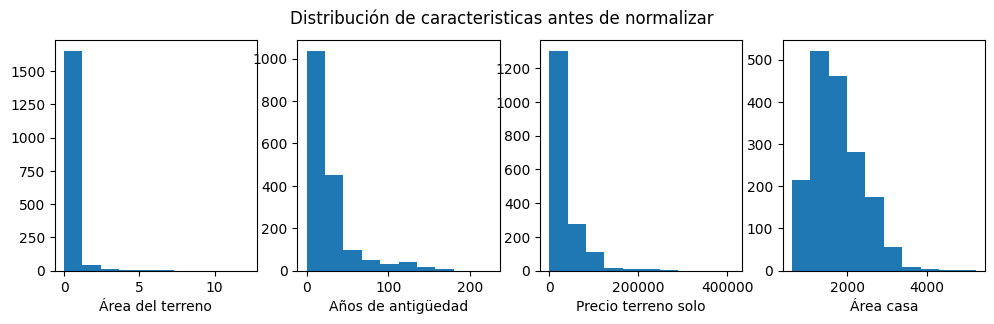

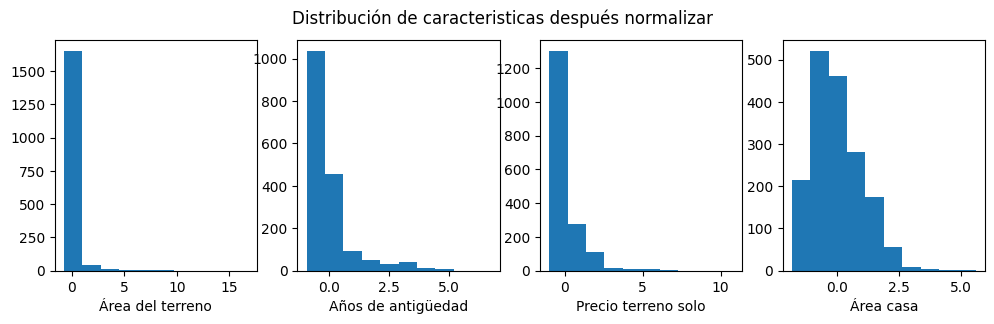

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

#Load data
file_path = "/content/drive/MyDrive/Machine-Learning-2023/SaratogaHouses.txt"
houses=np.loadtxt(file_path,delimiter=',')
Xh=houses[:,:9]
th=houses[:,9] #Costo de la Casa"
labels=["Área del terreno","Años de antigüedad","Precio terreno solo","Área casa","Patio","Habitaciones","Chimeneas","Baños","Cuartos"]
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()


In [21]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 10, number of weight updates: 17281.0
model parameters:                   w: [204768.87166114], b:[  2502.12651973   -516.02697489  18375.43901008  56945.08836686
   -783.74462941 -11339.6087358    7038.71808317   3972.59392023
   9651.47805342]


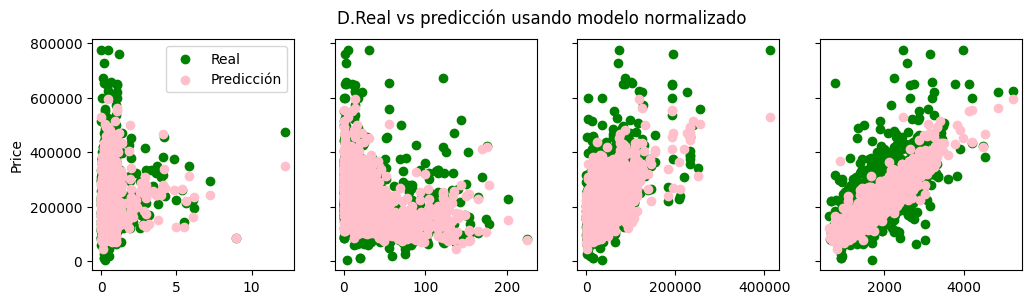

In [36]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th,color="green", label = 'Real')
    ax[i].scatter(Xh[:,i],yp,color="pink", label = 'Predicción')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("D.Real vs predicción usando modelo normalizado")
plt.show()

In [22]:
#USING LIBRARIES
#Split in Train and Test samples.
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

#Test score
sgdr.score(X_test,y_test)

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 7, number of weight updates: 8464.0
model parameters:                   w: [212497.2211535], b:[  -575.35061132 -11182.94171312  21345.5368489   44690.17842703
    803.4234217   -3969.25238146   1118.11880972  16336.29041332
  10227.79693116]


0.581084422033191

In [25]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

input_dim = 9
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 253ms/step - loss: 53434535936.0000
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 51004514304.0000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 48732516352.0000
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 46603968512.0000
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 44605980672.0000
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 42727149568.0000
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 40957345792.0000
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 39287590912.0000
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 37709852672.0000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 36216995840.0000
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 34802626560.0000
Epoch 12/100
1/1 [======

In [27]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 7890.3945]
 [-5740.46  ]
 [26668.34  ]
 [26805.637 ]
 [ 3138.6636]
 [ 2209.592 ]
 [ 5196.6797]
 [17147.271 ]
 [11879.154 ]] [182886.9]


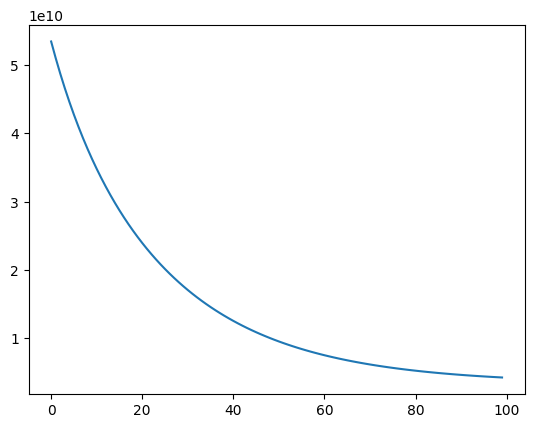

In [28]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [29]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 17ms/step - loss: 4239663872.0000
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 4206445568.0000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 4174494720.0000
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 4143763456.0000
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 4114203648.0000
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 4085771264.0000
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 4058420480.0000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 4032110336.0000
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 4006800640.0000
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 3982451200.0000
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 3959026176.0000
Epoch 12/100
1/1 [=================

In [30]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 6628.1514]
 [-6129.2817]
 [31209.521 ]
 [32548.428 ]
 [ 1802.365 ]
 [-2392.43  ]
 [ 2947.8484]
 [16001.442 ]
 [10501.334 ]] [207366.42]


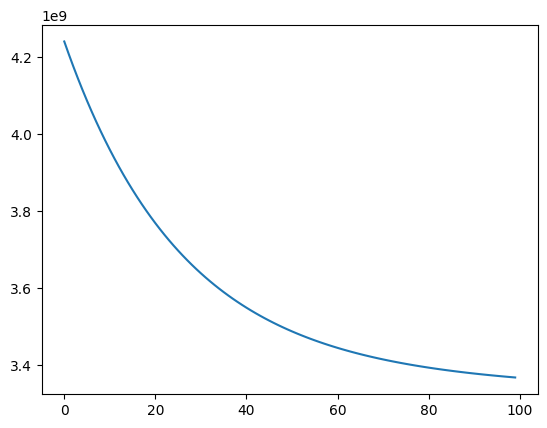

In [31]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
score

4555834880.0